# Ch5. Compressing Data via Dimensionality Reduction

# 1. Unsupervised dimensionality reduction via principal component analysis

- **feature extraction** : 새로운 feature space로 data를 변형하거나 사영하는 방법
- computation  효율을 향상시키고 "차원의 저주"를 해결할 수 있음

- **Principal component analysis (PCA)**

> -  unsupervised linear transformation technique

> -  많이 사용되는 차원축소 기법,  feature 사이의 상관관계에 기반한 패턴 규명법

> -  exploratory data analyses, de-noising of signals in stock market trading, bioinformatics  등에 자주 사용

> - high dimensional data에서 maximum variance의 방향(고유벡터)과 크기(고유값)를 찾아서 이를 기반으로 저차원 또는 동일차원으로 데이터를 사영(projection) 함.

**PCA에 대한 설명**

http://t-robotics.blogspot.kr/2014/10/pca-principal-component-analysis.html#.WCMkcdzQq8U
http://rfriend.tistory.com/181
http://rfriend.tistory.com/182

##  1) Total and explained variance

- first four steps of a principal component analysis:

> 1) standardizing the data 

> 2) constructing the covariance matrix

> 3) obtaining the eigenvalues and eigenvectors of the covariance matrix

> 4) sorting the eigenvalues by decreasing order to rank the eigenvectors

In [2]:
#  data download
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)

In [3]:
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df_wine.shape # data 구조

(178, 14)

###  a) separate training and test sets


In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values  # X값은 모든 열의 1행부터  끝행까지,  y값은 모든열의 0향
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)  # test  data는 전체 데이터의 30%

#  표준화  
sc = StandardScaler()  
X_train_std = sc.fit_transform(X_train)  
X_test_std = sc.fit_transform(X_test)

In [6]:
X_train.shape

(124, 13)

In [7]:
X_train

array([[  1.37100000e+01,   1.86000000e+00,   2.36000000e+00, ...,
          1.11000000e+00,   4.00000000e+00,   1.03500000e+03],
       [  1.22200000e+01,   1.29000000e+00,   1.94000000e+00, ...,
          8.60000000e-01,   3.02000000e+00,   3.12000000e+02],
       [  1.32700000e+01,   4.28000000e+00,   2.26000000e+00, ...,
          5.90000000e-01,   1.56000000e+00,   8.35000000e+02],
       ..., 
       [  1.24200000e+01,   1.61000000e+00,   2.19000000e+00, ...,
          1.06000000e+00,   2.96000000e+00,   3.45000000e+02],
       [  1.39000000e+01,   1.68000000e+00,   2.12000000e+00, ...,
          9.10000000e-01,   3.33000000e+00,   9.85000000e+02],
       [  1.41600000e+01,   2.51000000e+00,   2.48000000e+00, ...,
          6.20000000e-01,   1.71000000e+00,   6.60000000e+02]])

In [8]:
X_train_std

array([[ 0.91083058, -0.46259897, -0.01142613, ...,  0.65706596,
         1.94354495,  0.93700997],
       [-0.95609928, -0.96608672, -1.53725357, ..., -0.40859506,
         0.58118003, -1.41336684],
       [ 0.35952243,  1.67501572, -0.37471838, ..., -1.55950896,
        -1.44846566,  0.28683658],
       ..., 
       [-0.70550467, -0.68342693, -0.62902295, ...,  0.44393375,
         0.49776993, -1.30608823],
       [ 1.14889546, -0.6215951 , -0.88332752, ..., -0.19546286,
         1.0121322 ,  0.77446662],
       [ 1.47466845,  0.11155374,  0.42452457, ..., -1.43162964,
        -1.23994042, -0.28206514]])

### b) constructing the covariance matrix

In [9]:
import numpy as np
cov_mat = np.cov(X_train_std.T) # feature간 공분산 구하기
print(cov_mat)  #  13  by 13 matrix

[[ 1.00813008  0.08797701  0.23066952 -0.32868099  0.2141631   0.35576761
   0.2991246  -0.16913744  0.09649074  0.56962271 -0.04781543  0.07403492
   0.63277882]
 [ 0.08797701  1.00813008  0.2016416   0.30658143 -0.06030917 -0.30124242
  -0.41221162  0.36616593 -0.19190146  0.30749173 -0.54992807 -0.39352761
  -0.20253906]
 [ 0.23066952  0.2016416   1.00813008  0.44971971  0.18321413  0.12235533
   0.06130256  0.18655693 -0.02607834  0.24555355 -0.10928021 -0.01820002
   0.15948032]
 [-0.32868099  0.30658143  0.44971971  1.00813008 -0.08930998 -0.37018442
  -0.41804463  0.40212108 -0.25765667 -0.03090225 -0.25313262 -0.28934372
  -0.48504311]
 [ 0.2141631  -0.06030917  0.18321413 -0.08930998  1.00813008  0.16513295
   0.14458703 -0.30763563  0.27228619  0.1260674   0.05792599  0.01596134
   0.31461066]
 [ 0.35576761 -0.30124242  0.12235533 -0.37018442  0.16513295  1.00813008
   0.88119961 -0.45396901  0.6196806  -0.06935051  0.45718802  0.72214462
   0.56326772]
 [ 0.2991246  -0.41221

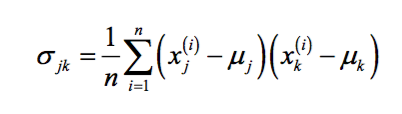

In [10]:
from IPython.display import Image
Image("/Users/cschoi/Study/Psy_deepbasic/Py_ML/Ch05_Dimensionality/fig/cov.png")

-  sample을 표준화 시켰다면 각 feature의 평균은 0이므로,  각 feature의 값을 곱한 값의 합에 대한 평균을 의미함.
-  공분산 값이 양수이면 두 featrue가 같은 방향으로,  음수이면 반대방향성을 가짐.

In [11]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)  
print('\nEigenValues \n%s' % eigen_vals)


EigenValues 
[ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.08414846  0.33051429  0.29595018  0.16831254  0.21432212
  0.2399553 ]


In [12]:
eigen_vecs

array([[  1.46698114e-01,   5.04170789e-01,  -1.17235150e-01,
          2.06254611e-01,  -1.87815947e-01,  -1.48851318e-01,
         -1.79263662e-01,  -5.54687162e-02,  -4.03054922e-01,
         -4.17197583e-01,   2.75660860e-01,   4.03567189e-01,
          4.13320786e-04],
       [ -2.42245536e-01,   2.42168894e-01,   1.49946576e-01,
          1.30489298e-01,   5.68639776e-01,  -2.69052764e-01,
         -5.92636731e-01,   3.32731614e-02,  -1.01833706e-01,
          2.17101488e-01,  -8.13845005e-02,  -1.52474999e-01,
         -8.78560762e-02],
       [ -2.99344215e-02,   2.86984836e-01,   6.56394387e-01,
          1.51536318e-02,  -2.99209426e-01,  -9.33386061e-02,
          6.07334578e-02,  -1.00618575e-01,   3.51841423e-01,
          1.28549846e-01,  -1.29751275e-02,   1.68376064e-01,
         -4.52518598e-01],
       [ -2.55190023e-01,  -6.46871827e-02,   5.84282337e-01,
         -9.04220851e-02,  -4.12499478e-02,  -1.01342392e-01,
          2.50323869e-01,   5.61658566e-02,  -5.004

In [13]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

In [14]:
sorted(eigen_vals, reverse = True)

[4.8923083032737411,
 2.4663503157592297,
 1.4280997275048448,
 1.0123346209044923,
 0.84906459334502582,
 0.60181514342298958,
 0.52251546206399679,
 0.33051429173094082,
 0.29595018365934694,
 0.23995530477949106,
 0.2143221186987235,
 0.16831253504096219,
 0.084148456726794385]

In [15]:
cum_var_exp = np.cumsum(var_exp) # var_exp를 cumulative summation
cum_var_exp

array([ 0.37329648,  0.56148574,  0.67045365,  0.74769754,  0.81248349,
        0.85840362,  0.89827298,  0.92349212,  0.94607393,  0.96438317,
        0.98073654,  0.99357924,  1.        ])

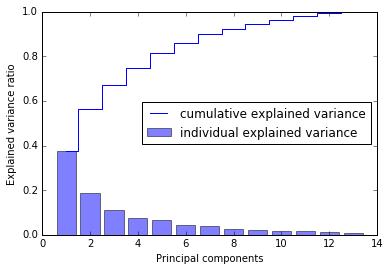

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(range(1, 14), var_exp, alpha = 0.5, align = 'center', label = 'individual explained variance')
plt.step(range(1, 14), cum_var_exp, where = 'mid', label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')

- 제1  주성분이 전체 분산의 약 40%를 커버하며,  제2  주성분까지 포함될 경우 60%까지 설명가능함.

## 2) Feature transformation

### a) 고유값과 고유벡터 묶음 만들기

In [17]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs

[(4.8923083032737411,
  array([ 0.14669811, -0.24224554, -0.02993442, -0.25519002,  0.12079772,
          0.38934455,  0.42326486, -0.30634956,  0.30572219, -0.09869191,
          0.30032535,  0.36821154,  0.29259713])),
 (2.4663503157592297,
  array([ 0.50417079,  0.24216889,  0.28698484, -0.06468718,  0.22995385,
          0.09363991,  0.01088622,  0.01870216,  0.03040352,  0.54527081,
         -0.27924322, -0.174365  ,  0.36315461])),
 (1.4280997275048448,
  array([-0.11723515,  0.14994658,  0.65639439,  0.58428234,  0.08226275,
          0.18080442,  0.14295933,  0.17223475,  0.1583621 , -0.14242171,
          0.09323872,  0.19607741, -0.09731711])),
 (1.0123346209044923,
  array([ 0.20625461,  0.1304893 ,  0.01515363, -0.09042209, -0.83912835,
          0.19317948,  0.14045955,  0.33733262, -0.1147529 ,  0.07878571,
          0.02417403,  0.18402864,  0.05676778])),
 (0.84906459334502582,
  array([-0.18781595,  0.56863978, -0.29920943, -0.04124995, -0.02719713,
          0.1406454

In [18]:
eigen_pairs.sort(reverse= True) # eigen vector가 큰 순서부터 작은순서로 sorting

In [19]:
eigen_pairs 

[(4.8923083032737411,
  array([ 0.14669811, -0.24224554, -0.02993442, -0.25519002,  0.12079772,
          0.38934455,  0.42326486, -0.30634956,  0.30572219, -0.09869191,
          0.30032535,  0.36821154,  0.29259713])),
 (2.4663503157592297,
  array([ 0.50417079,  0.24216889,  0.28698484, -0.06468718,  0.22995385,
          0.09363991,  0.01088622,  0.01870216,  0.03040352,  0.54527081,
         -0.27924322, -0.174365  ,  0.36315461])),
 (1.4280997275048448,
  array([-0.11723515,  0.14994658,  0.65639439,  0.58428234,  0.08226275,
          0.18080442,  0.14295933,  0.17223475,  0.1583621 , -0.14242171,
          0.09323872,  0.19607741, -0.09731711])),
 (1.0123346209044923,
  array([ 0.20625461,  0.1304893 ,  0.01515363, -0.09042209, -0.83912835,
          0.19317948,  0.14045955,  0.33733262, -0.1147529 ,  0.07878571,
          0.02417403,  0.18402864,  0.05676778])),
 (0.84906459334502582,
  array([-0.18781595,  0.56863978, -0.29920943, -0.04124995, -0.02719713,
          0.1406454

###  b) 특정 주성분 추출  (제1주성분,  제2주성분)

In [20]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], # 제1주성분과 제2주성분에 대한 고유벡터를 행에서 열로 만들어줌
              eigen_pairs[1][1][:,np.newaxis]))            #  각 성분의 고유벡터를 hstack으로 column binding
print('Matrix W :\n', w)

Matrix W :
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


###  c)  선택한 주성분으로 정사영 ( projection)

In [21]:
X_train_std[0].dot(w)

array([ 2.59891628,  0.00484089])

In [22]:
X_train_pca = X_train_std.dot(w)

In [23]:
X_train_std.shape

(124, 13)

In [24]:
X_train_pca.shape

(124, 2)

1 r s
2 b x
3 g o


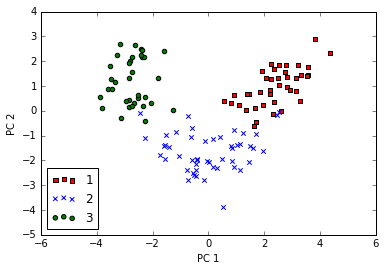

In [25]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for lab, c, m in zip(np.unique(y_train), colors, markers):
    print(lab, c, m)
    plt.scatter(X_train_pca[y_train == lab, 0], X_train_pca[y_train == lab, 1], 
                c = c, label = lab, marker = m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.show()

## 3) scikit learn을 통한 PCA / 성능 확인

In [26]:
from matplotlib.colors import ListedColormap
   
def plot_decision_regions(X, y, classifier, resolution=0.02):
       
        # setup marker generator and color map
        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y))])
        
        # plot the decision surface
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution))
        
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        
        plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        
        # plot class samples
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                        alpha=0.8, c=cmap(idx),
                        marker=markers[idx], label=cl)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)
lr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

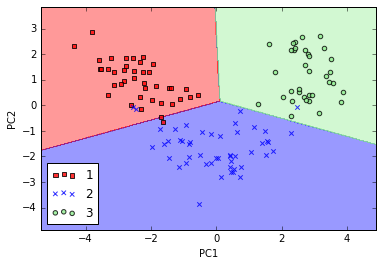

In [28]:
plot_decision_regions(X_train_pca, y_train, classifier = lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc = 'lower left')
plt.show()

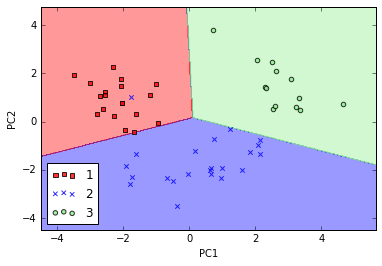

In [29]:
plot_decision_regions(X_test_pca, y_test, classifier = lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc = 'lower left')
plt.show()

In [30]:
pca.explained_variance_ratio_ # variance  ratio 출력

array([ 0.34497227,  0.20972293])

-----

# 2. Supervised data compression via linear discriminant analysis (LDA)

- class 분리가 가장 최적화된 feature subspace를 찾는것이 목적임.

-  PCA와의 공통점 : dataset의 차원 축소를 위한 linear transformation technique
-  PCA와의 차이점  :  PCA (unsupervised), LDA (supervised)

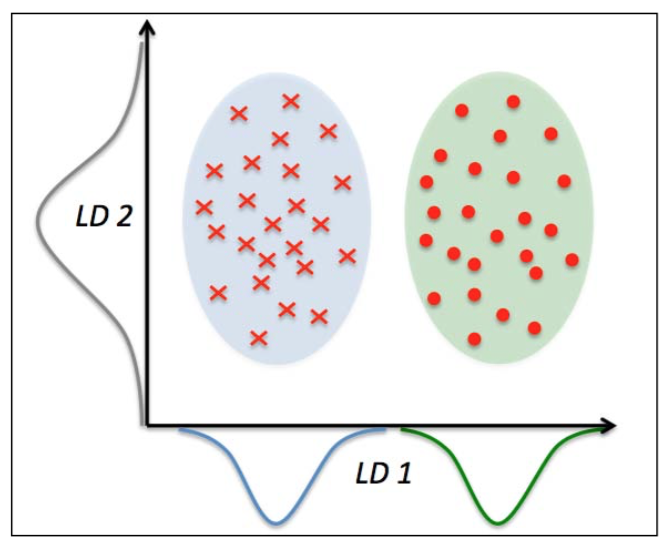

In [31]:
from IPython.display import Image
Image("./Py_ML/Ch05_Dimensionality/fig/LDA.png")

- **LDA process**

> - d 차원의 데이터를 표준화 함
> - 각 class에 대하여,  d  차원의 평균 벡터를 구함
> - class간 scatter matrix(SB)와  class내 scatter matrix(SW) 구함
> - SW^(-1)*SB  matrix에 대한 고유값과 고유벡터 구함
> -  고유값들 중 가장 큰 고유값에 대응하는 고유벡터를 선택하여 d x k 차원의 transformation matrix W를 구함.
> - matrix W에 대하여 정사영함.

-  참고 
http://200315193.tistory.com/1737

## 1)  Computing the scatter matrices

-  위에서 이미 표준화를 했기때문에 표준화한 데이터(X_train_std) 사용
-  각 class 별 (y 값 :  1,  2,  3)  feature 의 평균 (feature 개수 총 13개)에 대한  mean vector  생성

In [32]:
np.set_printoptions(precision = 4) # 소수점 4째자리까지 출력
mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print('MV %s: %s\n' %(label, mean_vecs[label-1]))

MV 1: [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]

MV 2: [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]

MV 3: [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]



### a) within scatter matrix

In [64]:
print('Class label distribution: %s' % np.bincount(y_train)[1:])

Class label distribution: [40 49 35]


In [65]:
import numpy as np

d = 13
S_W = np.zeros((d, d))

for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter

In [66]:
print('Scaled within-class scatter matrix : %s x %s' %(S_W.shape[0], S_W.shape[1]))

Scaled within-class scatter matrix : 13 x 13


### b) between scatter matrix

In [67]:
import numpy as np

mean_overall = np.mean(X_train_std, axis = 0)
mean_overall

array([  2.8902e-15,  -1.2556e-15,   1.1451e-15,   2.5625e-15,
        -3.2590e-16,  -1.3511e-15,   2.7756e-16,  -1.6394e-15,
         1.0816e-15,  -3.9395e-17,  -1.8623e-16,   1.0690e-15,   2.2831e-17])

In [72]:
d = 13
S_B = np.zeros((d, d))

for i, mean_vec in enumerate(mean_vecs):
    n = X[y == i + 1, :].shape[0]                     # enumerate시 0부터 시작하기 때문에 i + 1 로 지정 
    mean_vec = mean_vec.reshape(d, 1)
    mean_overall = mean_overall.reshape(d, 1)
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

In [75]:
print('Between-class scatter matrix: %s X %s'  %(S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13 X 13


In [77]:
for i, mean_vec in enumerate(mean_vecs):
    print(i, mean_vec)

0 [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]
1 [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]
2 [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]


## 2)  Selecting linear discriminants for the new feature subspace

-  SW^(-1)*SB  matrix에 대한 고유값과  고유벡터를  구해보자

In [80]:
import numpy as np

eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
print(eigen_vals.shape)
print(eigen_vecs.shape)

(13,)
(13, 13)


In [85]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
print(eigen_pairs)

[(5.6843418860808015e-14, array([ 0.7783+0.j, -0.1244+0.j, -0.2383+0.j,  0.2320+0.j,  0.0077+0.j,
        0.0750+0.j, -0.0885+0.j,  0.0212+0.j,  0.1323+0.j, -0.1247+0.j,
        0.1259+0.j, -0.0550+0.j, -0.4498+0.j])), (225.08698185416245, array([-0.3778+0.j, -0.2223+0.j, -0.3813+0.j,  0.2955+0.j,  0.0143+0.j,
        0.0151+0.j,  0.2149+0.j,  0.0726+0.j,  0.1767+0.j, -0.2909+0.j,
        0.2376+0.j,  0.0867+0.j, -0.5860+0.j])), (643.01538434605106, array([-0.0707+0.j,  0.0359+0.j, -0.0263+0.j,  0.1875+0.j, -0.0033+0.j,
        0.2328+0.j, -0.7719+0.j, -0.0803+0.j,  0.0896+0.j,  0.1815+0.j,
       -0.0631+0.j, -0.3794+0.j, -0.3355+0.j])), (6.5715406336761972e-14, array([-0.6095+0.j    ,  0.1064-0.0159j,  0.2590+0.1122j, -0.2607-0.0267j,
       -0.0379-0.0185j,  0.1061-0.0332j, -0.2851-0.2348j, -0.0298-0.0146j,
       -0.1103+0.0177j, -0.0054-0.0249j, -0.1436-0.0741j,  0.1897+0.272j ,
        0.4085+0.029j ])), (6.5715406336761972e-14, array([-0.6095-0.j    ,  0.1064+0.0159j,  0.2590-0.

In [86]:
eigen_pairs = sorted(eigen_pairs, key = lambda k : k[0], reverse = True) # eigen value가 큰 순서대로  sorting
print(eigen_pairs)

[(643.01538434605106, array([-0.0707+0.j,  0.0359+0.j, -0.0263+0.j,  0.1875+0.j, -0.0033+0.j,
        0.2328+0.j, -0.7719+0.j, -0.0803+0.j,  0.0896+0.j,  0.1815+0.j,
       -0.0631+0.j, -0.3794+0.j, -0.3355+0.j])), (225.08698185416245, array([-0.3778+0.j, -0.2223+0.j, -0.3813+0.j,  0.2955+0.j,  0.0143+0.j,
        0.0151+0.j,  0.2149+0.j,  0.0726+0.j,  0.1767+0.j, -0.2909+0.j,
        0.2376+0.j,  0.0867+0.j, -0.5860+0.j])), (6.5715406336761972e-14, array([-0.6095+0.j    ,  0.1064-0.0159j,  0.2590+0.1122j, -0.2607-0.0267j,
       -0.0379-0.0185j,  0.1061-0.0332j, -0.2851-0.2348j, -0.0298-0.0146j,
       -0.1103+0.0177j, -0.0054-0.0249j, -0.1436-0.0741j,  0.1897+0.272j ,
        0.4085+0.029j ])), (6.5715406336761972e-14, array([-0.6095-0.j    ,  0.1064+0.0159j,  0.2590-0.1122j, -0.2607+0.0267j,
       -0.0379+0.0185j,  0.1061+0.0332j, -0.2851+0.2348j, -0.0298+0.0146j,
       -0.1103-0.0177j, -0.0054+0.0249j, -0.1436+0.0741j,  0.1897-0.272j ,
        0.4085-0.029j ])), (5.68434188608080

In [87]:
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in decreasing order:

643.015384346
225.086981854
6.57154063368e-14
6.57154063368e-14
5.68434188608e-14
3.72627228953e-14
3.72627228953e-14
3.15408947325e-14
2.00734563836e-14
6.25585000029e-15
6.25585000029e-15
5.77317781531e-15
1.53141678024e-15


In [88]:
eigen_vals.real

array([ -5.6843e-14,   2.2509e+02,   6.4302e+02,  -6.2337e-14,
        -6.2337e-14,   3.5769e-14,   3.5769e-14,  -3.1541e-14,
         2.0073e-14,   2.1916e-15,   2.1916e-15,  -5.7732e-15,   1.5314e-15])

In [89]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse = True)]
cum_discr = np.cumsum(discr)

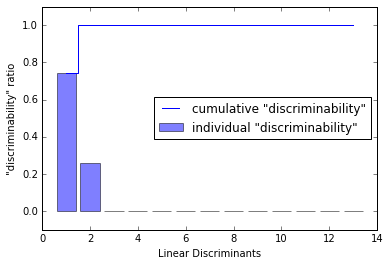

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(range(1, 14), discr, alpha = 0.5, align ='center', label = 'individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid', label = 'cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc = 'best')
plt.show()

In [92]:
eigen_pairs[0][1]

array([-0.0707+0.j,  0.0359+0.j, -0.0263+0.j,  0.1875+0.j, -0.0033+0.j,
        0.2328+0.j, -0.7719+0.j, -0.0803+0.j,  0.0896+0.j,  0.1815+0.j,
       -0.0631+0.j, -0.3794+0.j, -0.3355+0.j])

In [93]:
w = np.hstack((eigen_pairs[0][1] [:, np.newaxis].real, 
              eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.0707 -0.3778]
 [ 0.0359 -0.2223]
 [-0.0263 -0.3813]
 [ 0.1875  0.2955]
 [-0.0033  0.0143]
 [ 0.2328  0.0151]
 [-0.7719  0.2149]
 [-0.0803  0.0726]
 [ 0.0896  0.1767]
 [ 0.1815 -0.2909]
 [-0.0631  0.2376]
 [-0.3794  0.0867]
 [-0.3355 -0.586 ]]


## 3) Projecting samples onto the new feature space

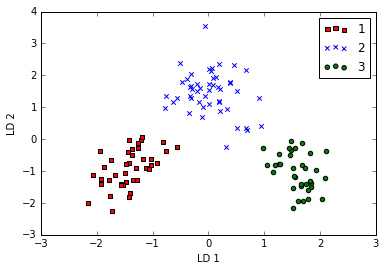

In [94]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0],
                X_train_lda[y_train==l, 1],
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='upper right')
plt.show()

## 4) LDA via scikit-learn

In [95]:
from sklearn.lda import LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

/Users/cschoi/.pyenv/versions/3.5.1/envs/venv3.5.1/lib/python3.5/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [102]:
!pip list --outdated

ipykernel (4.4.1) - Latest: 4.5.0 [wheel]
ipyparallel (5.1.1) - Latest: 5.2.0 [wheel]
ipython (5.0.0) - Latest: 5.1.0 [wheel]
jupyter-client (4.3.0) - Latest: 4.4.0 [wheel]
jupyter-contrib-nbextensions (0.2.0) - Latest: 0.2.1 [wheel]
jupyter-core (4.1.1) - Latest: 4.2.0 [wheel]
matplotlib (1.5.1) - Latest: 1.5.3 [wheel]
notebook (4.2.2) - Latest: 4.2.3 [wheel]
numpy (1.11.1) - Latest: 1.11.2 [wheel]
pandas (0.18.1) - Latest: 0.19.1 [wheel]
pexpect (4.2.0) - Latest: 4.2.1 [wheel]
pickleshare (0.7.3) - Latest: 0.7.4 [wheel]
pip (8.1.2) - Latest: 9.0.1 [wheel]
prompt-toolkit (1.0.5) - Latest: 1.0.9 [wheel]
psutil (4.3.1) - Latest: 5.0.0 [sdist]
pyparsing (2.1.7) - Latest: 2.1.10 [wheel]
python-dateutil (2.5.3) - Latest: 2.6.0 [wheel]
pytz (2016.6.1) - Latest: 2016.7 [wheel]
pyzmq (15.4.0) - Latest: 16.0.1 [wheel]
requests (2.11.0) - Latest: 2.11.1 [wheel]
scikit-learn (0.17.1) - Latest: 0.18.1 [wheel]
scipy (0.18.0) - Latest: 0.18.1 [wheel]
setuptools (25.1.6) - Latest: 28.8.0 [wheel]
Sph

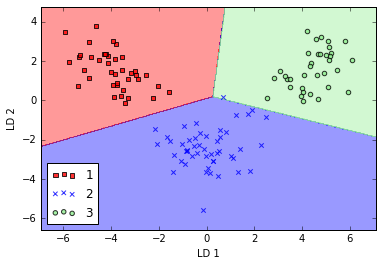

In [103]:
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

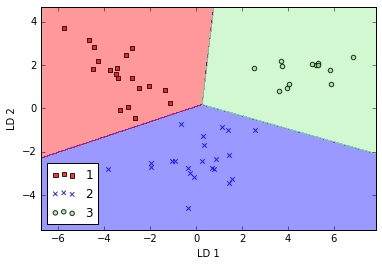

In [104]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()